In [1]:
from collections import Counter
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt 

# Loading Data and Summany of Table

In [2]:
# Loading Data and Summany

# Loading Data
job_data_df = pd.read_csv('job_postings_training_set.csv')

# Show Summany and 5 rows
display(job_data_df.info(verbose=True))
display(job_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17828 entries, 0 to 17827
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17828 non-null  int64 
 1   title                17828 non-null  object
 2   location             17483 non-null  object
 3   department           6314 non-null   object
 4   salary_range         2862 non-null   object
 5   company_profile      14538 non-null  object
 6   description          17827 non-null  object
 7   requirements         15140 non-null  object
 8   benefits             10644 non-null  object
 9   telecommuting        17828 non-null  int64 
 10  has_company_logo     17828 non-null  int64 
 11  has_questions        17828 non-null  int64 
 12  employment_type      14370 non-null  object
 13  required_experience  10804 non-null  object
 14  required_education   9755 non-null   object
 15  industry             12944 non-null  object
 16  func

None

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h1 style="color:red;">觀察:</h1><br>
除去目標欄位fraudulent與job_id外，有3個可辨識為數值的欄位: telecommuting、has_company_logo、has_questions<br>
且3個欄位的資料都是沒有缺失的，而剩下的object type可能很難做觀察。<br>
資料缺失比較多的屬性: department、salary_range、required_education、required_experience<br>

In [3]:
# Replace all the null to a word "Unknown"
job_data_df = job_data_df.fillna('Unknown')
display(job_data_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17828 entries, 0 to 17827
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17828 non-null  int64 
 1   title                17828 non-null  object
 2   location             17828 non-null  object
 3   department           17828 non-null  object
 4   salary_range         17828 non-null  object
 5   company_profile      17828 non-null  object
 6   description          17828 non-null  object
 7   requirements         17828 non-null  object
 8   benefits             17828 non-null  object
 9   telecommuting        17828 non-null  int64 
 10  has_company_logo     17828 non-null  int64 
 11  has_questions        17828 non-null  int64 
 12  employment_type      17828 non-null  object
 13  required_experience  17828 non-null  object
 14  required_education   17828 non-null  object
 15  industry             17828 non-null  object
 16  func

None

將所有空值以特殊字"Unknown"取代，可以看到所有欄位都有值了。<br>

# Observation of "fraudulent"

fraudulent, 1 is fake, 0 is not fake:


,0,1
Counts,16966,862
Percentage,95.16%,4.84%


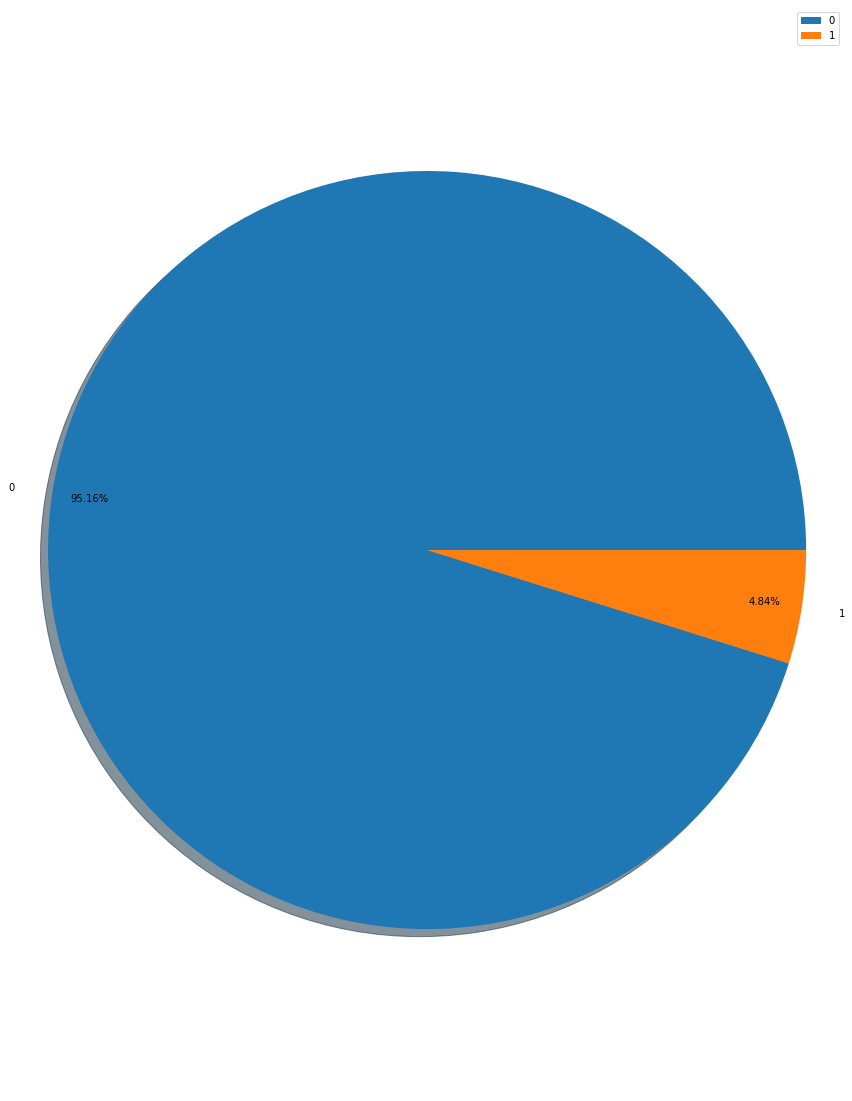

In [4]:
# Statistics of Label Data "fraudulent"
labels = []
label_counts = []

for count_label, counts in Counter(job_data_df["fraudulent"]).items():
    labels.append(count_label)
    label_counts.append(counts)

# Show Summany
print("===========================================")
print("fraudulent, 1 is fake, 0 is not fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in label_counts],
                      ['{:0.2f}%'.format(100*count/sum(label_counts)) for count in label_counts]],
                     columns=labels, index=['Counts', 'Percentage']))
# Creat Pie Chart
plt.figure(figsize=(15,20))
plt.pie(label_counts, labels=labels, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

<h1 style="color:red;">觀察:</h1><br>
資料不平衡度高，會影響訓練模型，後續可能要用Sample的方法來訓練<br>

# Observation of "telecommuting"

In [5]:
# Statistics of Data "telecommuting"
tags = []
tags_counts = []

for tag, counts in Counter(job_data_df["telecommuting"]).items():
    tags.append(str(tag))
    tags_counts.append(counts)

# Show Summany
print("===========================================")
print("Telecommuting tagging, 1 is telecommuting, 0 is unknown:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in tags_counts],
                      ['{:0.2f}%'.format(100*count/sum(tags_counts)) for count in tags_counts]],
                     columns=tags, index=['Counts', 'Percentage']))

Telecommuting tagging, 1 is telecommuting, 0 is unknown:


,0,1
Counts,17062,766
Percentage,95.70%,4.30%


<h1 style="color:red;">觀察:</h1><br>
有標明可遠距辦公的JD比例跟Fake JD的分布比例很像，有沒有關聯呢?<br>

# Relationship between "telecommuting" and "fraudulent"

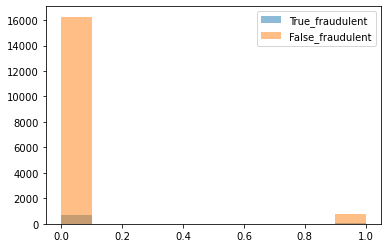

In [6]:
# Data filter for telecommuting

# filter: Jobs with tagging telecommuting
T_telecommuting = job_data_df.loc[job_data_df['telecommuting']==1]
# filter: Jobs without tagging telecommuting
F_telecommuting = job_data_df.loc[job_data_df['telecommuting']==0]

# Show Summany
plt.hist(T_telecommuting['fraudulent'], alpha=0.5, label='True_fraudulent')
plt.hist(F_telecommuting['fraudulent'], alpha=0.5, label='False_fraudulent')
plt.legend(loc='upper right')
plt.show()

<h1 style="color:red;">觀察:</h1><br>
透過直方圖統計，兩方覆蓋度不太明顯，如果正向關連度非常高，1統計柱是藍色，0則為橘色<br>

In [7]:
# Show Telecommuting Summany of T_fraudulent and F_fraudulent

# Jobs with tagging telecommuting
T_telecommuting_label = []
T_telecommuting_counts = []
for count_label, counts in Counter(T_telecommuting["fraudulent"]).items():
    T_telecommuting_label.append(count_label)
    T_telecommuting_counts.append(counts)

# Jobs without tagging telecommuting
F_telecommuting_label = []
F_telecommuting_counts = []
for count_label, counts in Counter(F_telecommuting["fraudulent"]).items():
    F_telecommuting_label.append(count_label)
    F_telecommuting_counts.append(counts)

# Show the table
print("===========================================")
print("Jobs with tagging telecommuting, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in T_telecommuting_counts],
                      ['{:0.2f}%'.format(100*count/sum(T_telecommuting_counts)) for count in T_telecommuting_counts]],
                     columns=T_telecommuting_label, index=['Counts', 'Percentage']))

print("===========================================")
print("Jobs without tagging telecommuting, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in F_telecommuting_counts],
                      ['{:0.2f}%'.format(100*count/sum(F_telecommuting_counts)) for count in F_telecommuting_counts]],
                     columns=F_telecommuting_label, index=['Counts', 'Percentage']))

Jobs with tagging telecommuting, 1 is fake:


,0,1
Counts,702,64
Percentage,91.64%,8.36%


Jobs without tagging telecommuting, 1 is fake:


,0,1
Counts,16264,798
Percentage,95.32%,4.68%


<h1 style="color:red;">觀察:</h1><br>
假冒的遠距工作JD在比例上快達到沒標明遠距工作的兩倍，雖然有標明遠距工作的數量遠少於沒標明的<br>
也就表示純遠距工作的應徵者在求職的風險上也比一般高<br>

# Observation of "has_company_logo"

In [8]:
# Statistics of Data "has_company_logo"
tags = []
tags_counts = []

for tag, counts in Counter(job_data_df["has_company_logo"]).items():
    tags.append(str(tag))
    tags_counts.append(counts)

# Show Summany
print("===========================================")
print("\"has_company_logo\" values, 1 is with company logo, 0 is without company logo:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in tags_counts],
                      ['{:0.2f}%'.format(100*count/sum(tags_counts)) for count in tags_counts]],
                     columns=tags, index=['Counts', 'Percentage']))

"has_company_logo" values, 1 is with company logo, 0 is without company logo:


,1,0
Counts,14181,3647
Percentage,79.54%,20.46%


<h1 style="color:red;">觀察:</h1><br>
大多數公司都有LOGO，或許沒公司LOGO的fake JD比例會比較高?<br>

# Relationship between "has_company_logo" and "fraudulent"

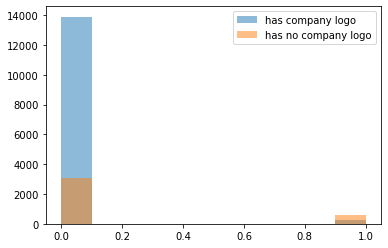

In [9]:
# Data filter for has_company_logo

# filter: Jobs have company logo
has_company_logo = job_data_df.loc[job_data_df['has_company_logo']==1]
# filter: Jobs have no company logo
has_no_company_logo = job_data_df.loc[job_data_df['has_company_logo']==0]

plt.hist(has_company_logo['fraudulent'], alpha=0.5, label='has company logo')
plt.hist(has_no_company_logo['fraudulent'], alpha=0.5, label='has no company logo')
plt.legend(loc='upper right')
plt.show()

<h1 style="color:red;">觀察:</h1><br>
透過直方圖，沒有公司LOGO的JD是Fake的比例明顯高於有LOGO，LOGO的有無可以提高JD可信度<br>
這個比例差距明顯到可以用圖觀察到，是比較顯著的特徵。

In [10]:
# Show Summany of has_company_logo and has_no_company_logo

# JD has company logo
has_company_logo_fraudulent = []
has_company_logo_fraudulent_counts = []
for count_label, counts in Counter(has_company_logo["fraudulent"]).items():
    has_company_logo_fraudulent.append(count_label)
    has_company_logo_fraudulent_counts.append(counts)

# JD has no company logo
has_no_company_logo_fraudulent = []
has_no_company_logo_fraudulent_counts = []
for count_label, counts in Counter(has_no_company_logo["fraudulent"]).items():
    has_no_company_logo_fraudulent.append(count_label)
    has_no_company_logo_fraudulent_counts.append(counts)

# Show the table
print("===========================================")
print("JD has company logo, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in has_company_logo_fraudulent_counts],
                      ['{:0.2f}%'.format(100*count/sum(has_company_logo_fraudulent_counts)) for count in has_company_logo_fraudulent_counts]],
                     columns=has_company_logo_fraudulent, index=['Counts', 'Percentage']))

print("===========================================")
print("JD has no company logo, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in has_no_company_logo_fraudulent_counts],
                      ['{:0.2f}%'.format(100*count/sum(has_no_company_logo_fraudulent_counts)) for count in has_no_company_logo_fraudulent_counts]],
                     columns=has_no_company_logo_fraudulent, index=['Counts', 'Percentage']))

JD has company logo, 1 is fake:


,0,1
Counts,13899,282
Percentage,98.01%,1.99%


JD has no company logo, 1 is fake:


,0,1
Counts,3067,580
Percentage,84.10%,15.90%


<h1 style="color:red;">觀察:</h1><br>
沒有公司LOGO的JD是fake的比例遠遠高於有公司LOGO<br>
也就表示應徵者在求職時，如果JD上沒有公司LOGO，其受騙風險是高的<br>

# Observation of "has_questions"

In [11]:
# Statistics of Data "has_questions"
tags = []
tags_counts = []

for tag, counts in Counter(job_data_df["has_questions"]).items():
    tags.append(str(tag))
    tags_counts.append(counts)

# Show Summany
print("===========================================")
print("\"has_questions\" values, 1 is having questions, 0 is no questions:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in tags_counts],
                      ['{:0.2f}%'.format(100*count/sum(tags_counts)) for count in tags_counts]],
                     columns=tags, index=['Counts', 'Percentage']))

"has_questions" values, 1 is having questions, 0 is no questions:


,0,1
Counts,9057,8771
Percentage,50.80%,49.20%


<h1 style="color:red;">觀察:</h1><br>
有問答的JD與無發問的JD比例差不多，可能不能作為判斷指標?<br>
無發問的JD也可能是太新，目前沒有Post Date欄位<br>

# Relationship between "has_questions" and "fraudulent"

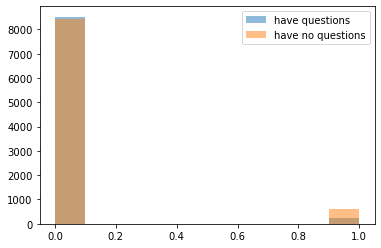

In [12]:
# Data filter for has_questions

# filter: Jobs have questions
has_questions = job_data_df.loc[job_data_df['has_questions']==1]
# filter: Jobs have no questions
has_no_questions = job_data_df.loc[job_data_df['has_questions']==0]

plt.hist(has_questions['fraudulent'], alpha=0.5, label='have questions')
plt.hist(has_no_questions['fraudulent'], alpha=0.5, label='have no questions')
plt.legend(loc='upper right')
plt.show()

<h1 style="color:red;">觀察:</h1><br>
透過直方圖，沒有問答的JD是Fake的比例明顯高於有問答的，但由於分布比例，可能作為特徵不夠強<br>

In [13]:
# Show Summany of has_questions and has_no_questions

# JD has company logo
has_questions_fraudulent = []
has_questions_fraudulent_counts = []
for count_label, counts in Counter(has_questions["fraudulent"]).items():
    has_questions_fraudulent.append(count_label)
    has_questions_fraudulent_counts.append(counts)

# JD has no company logo
has_no_questions_fraudulent = []
has_no_questions_fraudulent_counts = []
for count_label, counts in Counter(has_no_questions["fraudulent"]).items():
    has_no_questions_fraudulent.append(count_label)
    has_no_questions_fraudulent_counts.append(counts)

# Show the table
print("===========================================")
print("JD has questions, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in has_questions_fraudulent_counts],
                      ['{:0.2f}%'.format(100*count/sum(has_questions_fraudulent_counts)) for count in has_questions_fraudulent_counts]],
                     columns=has_questions_fraudulent, index=['Counts', 'Percentage']))

print("===========================================")
print("JD has no questions, 1 is fake:")
display(pd.DataFrame([['{:0.0f}'.format(count) for count in has_no_questions_fraudulent_counts],
                      ['{:0.2f}%'.format(100*count/sum(has_no_questions_fraudulent_counts)) for count in has_no_questions_fraudulent_counts]],
                     columns=has_no_questions_fraudulent, index=['Counts', 'Percentage']))

JD has questions, 1 is fake:


,0,1
Counts,8522,249
Percentage,97.16%,2.84%


JD has no questions, 1 is fake:


,0,1
Counts,8444,613
Percentage,93.23%,6.77%


<h1 style="color:red;">觀察:</h1><br>
沒有問答的JD是Fake的比例明顯高於有問答的<br>
後續針對數值型資料可以在進階處理階段觀察期相互關係

# Observation of Object Type Data

檢查物件型態資料是否為有限類別的資料(例如:男、女、不明這種)，明顯為文本或需要再處理的欄位先不考慮<br>

In [14]:
# Observation of Object Type Data

for column_name in list(job_data_df):
    if job_data_df[column_name].dtypes == object:
        count_categories = len(Counter(job_data_df[column_name]).keys())
        print(column_name, 'has', count_categories, 'categories')
        print("===========================================")

title has 11188 categories
location has 3098 categories
department has 1337 categories
salary_range has 875 categories
company_profile has 1708 categories
description has 14678 categories
requirements has 11882 categories
benefits has 6132 categories
employment_type has 6 categories
required_experience has 8 categories
required_education has 14 categories
industry has 132 categories
function has 38 categories


<h1 style="color:red;">觀察:</h1><br>
針對object型態的資料欄位，不重複職稱有11188個，來自3098地區，可能有1708家公司(這些都沒有排除空值，需要再細部處理)<br>
employment_type(6)，required_experience(8)，required_education(14)三個欄位是比較可能在初步資料觀察上就可運作的<br>

# Observation of employment_type

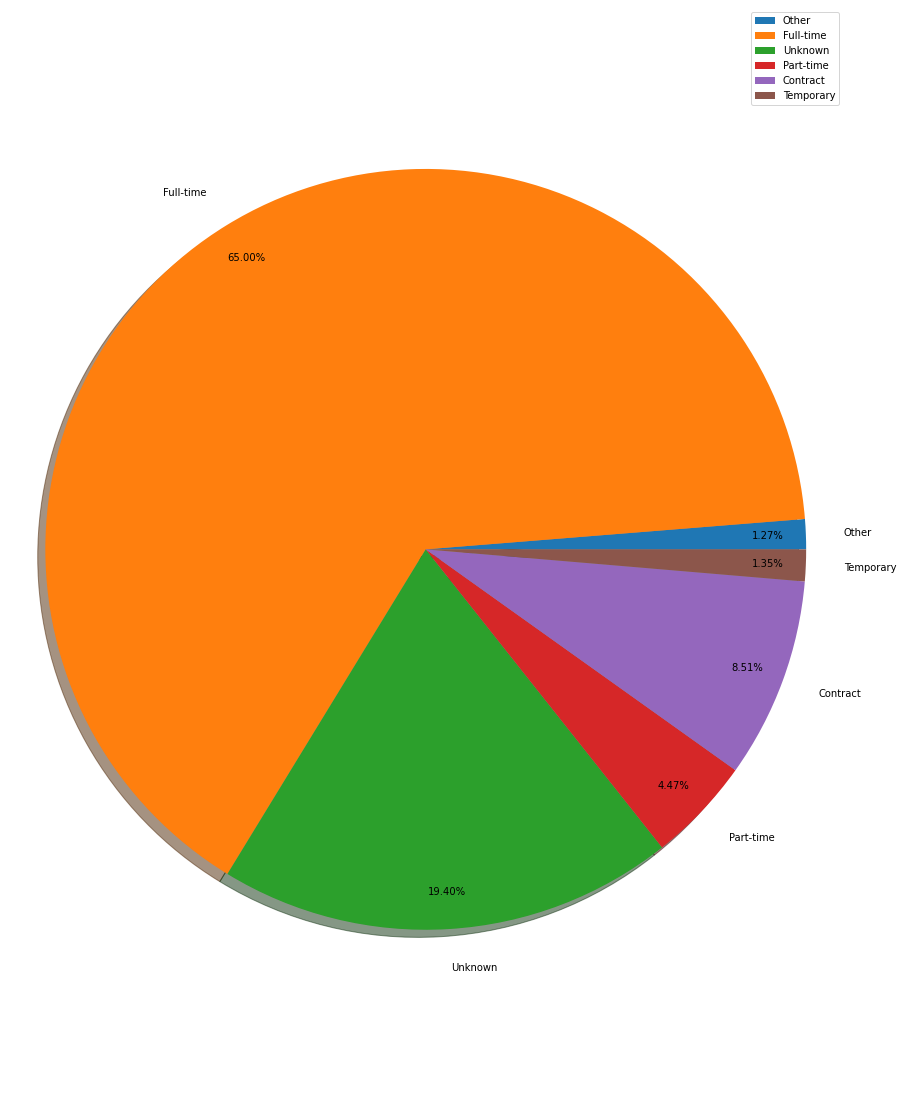

In [15]:
# Statistics of employment_type
employment_type_count_result = Counter(job_data_df['employment_type'])
employment_types = employment_type_count_result.keys()
employment_type_counts = [value for key, value in employment_type_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(employment_type_counts, labels=employment_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

# employment_type in fake JD

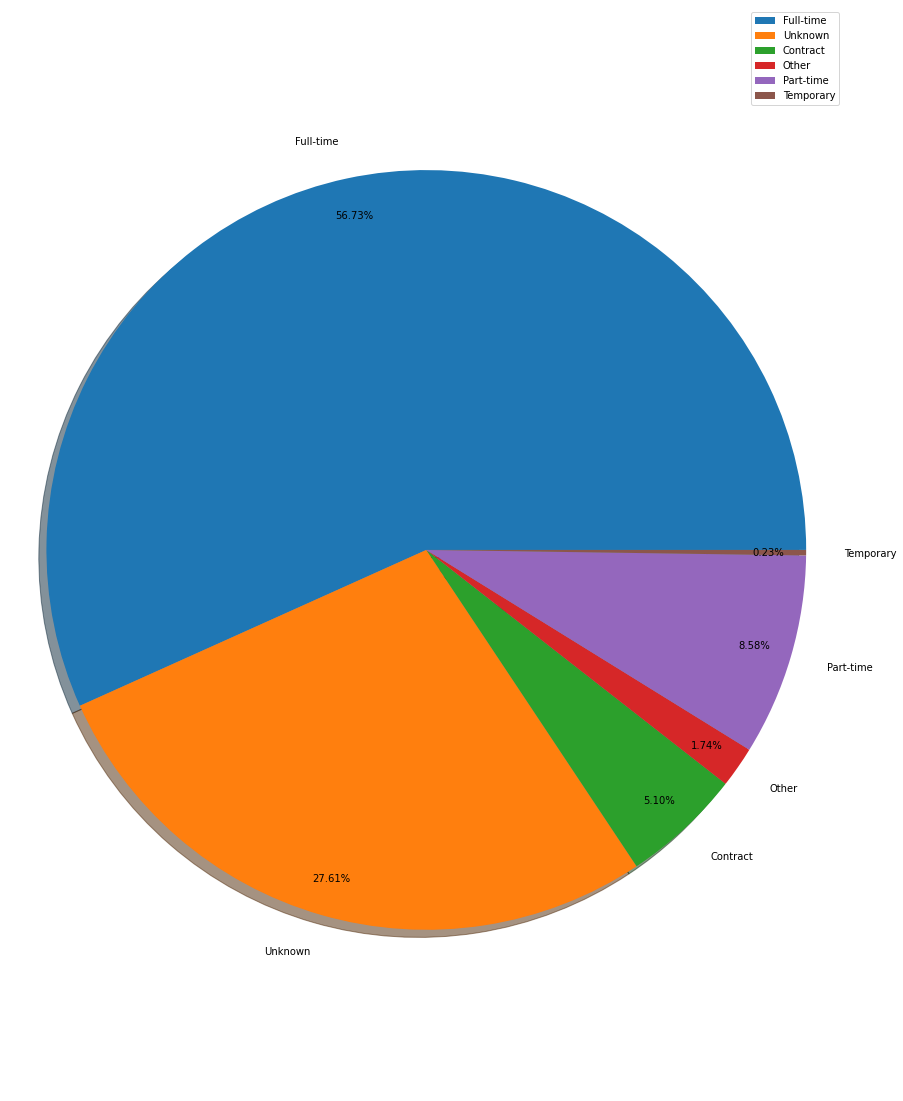

In [16]:
# employment_type in fake JD
F_employment_type_count_result = Counter(job_data_df.loc[job_data_df['fraudulent']==1]['employment_type'])
F_employment_types = F_employment_type_count_result.keys()
F_employment_type_counts = [value for key, value in F_employment_type_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(F_employment_type_counts, labels=F_employment_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

<h1 style="color:red;">觀察:</h1><br>
比較全部與Fake JD的職位類型分布比例，其中part-time的比例差距是顯著的，顯然part-time的求職風險較高，這是符合常識<br>

# Statistics of employment_type

In [28]:
# computing fake JD counts and rate for each employment_type
employment_type_fake_counts = []
for employment_type in employment_types:
    data_filter = (job_data_df['employment_type'] == employment_type)&(job_data_df['fraudulent']== 1)
    employment_type_fake_counts.append(len(job_data_df.loc[data_filter]['employment_type']))

employment_type_fake_rate = ['{:0.2f}%'.format(100*fake/total) for total, fake in zip(employment_type_counts, employment_type_fake_counts)]

display(pd.DataFrame([employment_type_counts, employment_type_fake_counts, employment_type_fake_rate],                      
                     columns=employment_types, index=['Counts', 'Fake_Counts', 'Fake_rate']))

,Other,Full-time,Unknown,Part-time,Contract,Temporary
Counts,227,11588,3458,797,1518,240
Fake_Counts,15,489,238,74,44,2
Fake_rate,6.61%,4.22%,6.88%,9.28%,2.90%,0.83%


<h1 style="color:red;">觀察:</h1><br>
使用表格又更明顯了，part-time的fake JD是占比最高的<br>

# Observation of required_experience

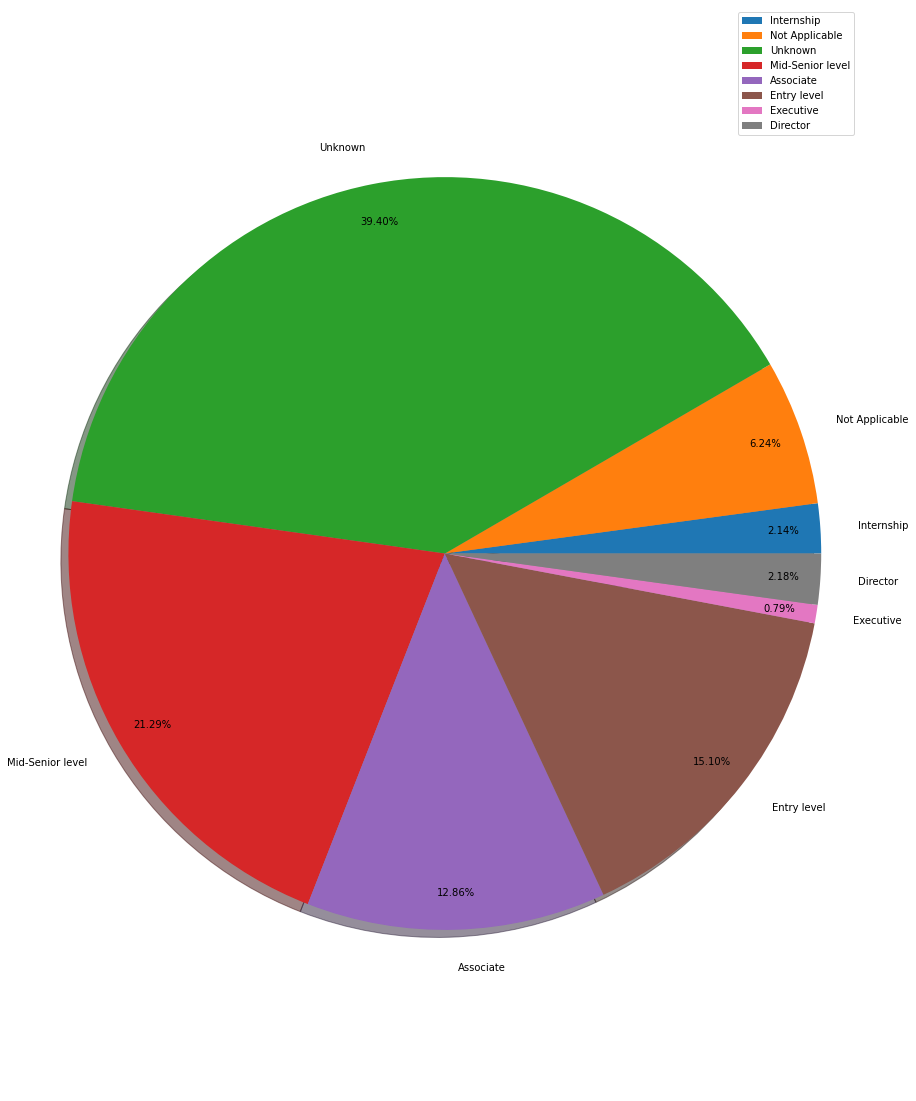

In [18]:
# Statistics of required_experience
required_experience_count_result = Counter(job_data_df['required_experience'])
required_experience_types = required_experience_count_result.keys()
required_experience_type_counts = [value for key, value in required_experience_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(required_experience_type_counts, labels=required_experience_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

# required_experience in fake JD

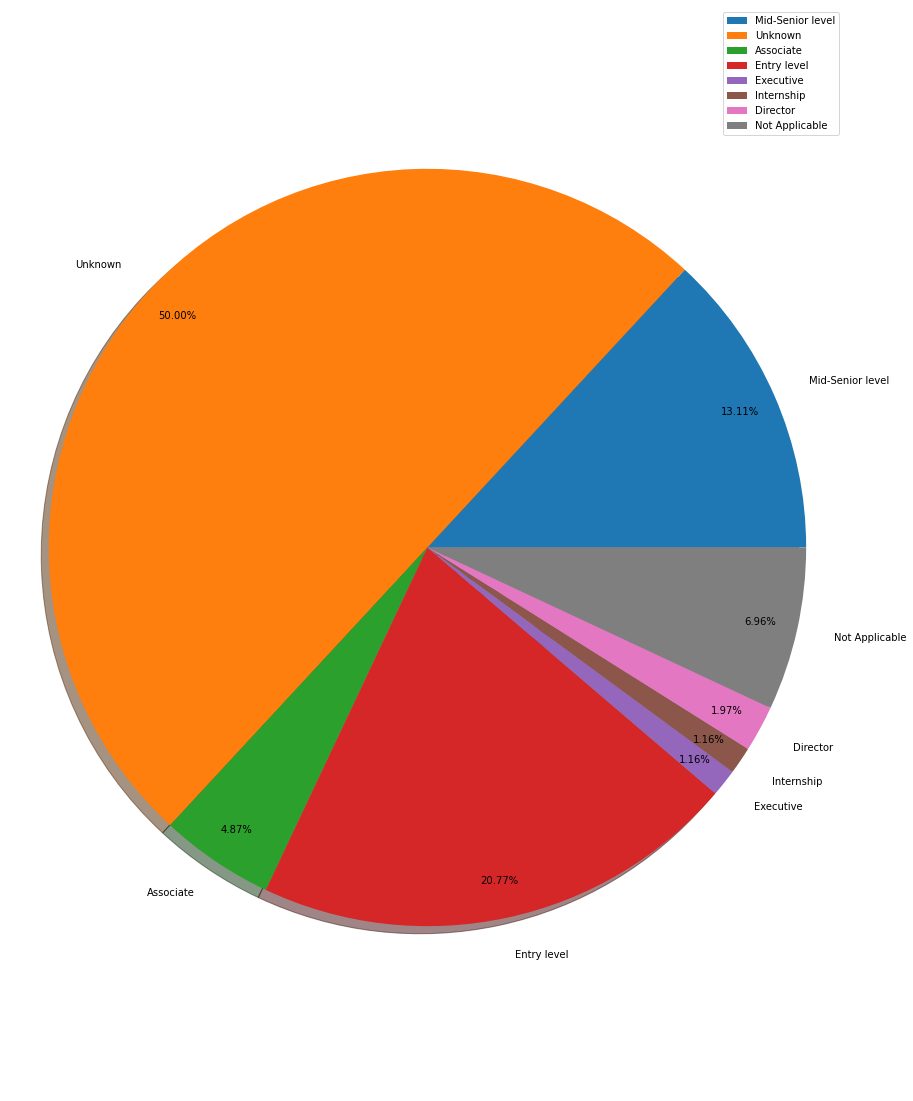

In [19]:
#required_experience in fake JD
F_required_experience_count_result = Counter(job_data_df.loc[job_data_df['fraudulent']==1]['required_experience'])
F_required_experience_types = F_required_experience_count_result.keys()
F_required_experience_counts = [value for key, value in F_required_experience_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(F_required_experience_counts, labels=F_required_experience_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

<h1 style="color:red;">觀察:</h1><br>
比較全部與Fake JD的經驗需求分布比例，其實是比較亂的，這部分必須再針對每個等級去展開才行<br>

# Statistics of required_experience

In [29]:
# computing fake JD counts and rate for each required_experience type
required_experience_fake_counts = []
for required_experience_type in required_experience_types:
    data_filter = (job_data_df['required_experience'] == required_experience_type)&(job_data_df['fraudulent']== 1)
    required_experience_fake_counts.append(len(job_data_df.loc[data_filter]['required_experience']))

required_experience_fake_rate = ['{:0.2f}%'.format(100*fake/total) for total, fake in zip(required_experience_type_counts, required_experience_fake_counts)]
display(pd.DataFrame([required_experience_type_counts, required_experience_fake_counts, required_experience_fake_rate],                      
                     columns=required_experience_types, index=['Counts', 'Fake_Counts', 'Fake_rate']))

,Internship,Not Applicable,Unknown,Mid-Senior level,Associate,Entry level,Executive,Director
Counts,381,1113,7024,3796,2292,2692,141,389
Fake_Counts,10,60,431,113,42,179,10,17
Fake_rate,2.62%,5.39%,6.14%,2.98%,1.83%,6.65%,7.09%,4.37%


<h1 style="color:red;">觀察:</h1><br>
從表格上沒有太大的差異，比例雖有起伏，但不夠有突出的現象<br>

# Observation of required_education

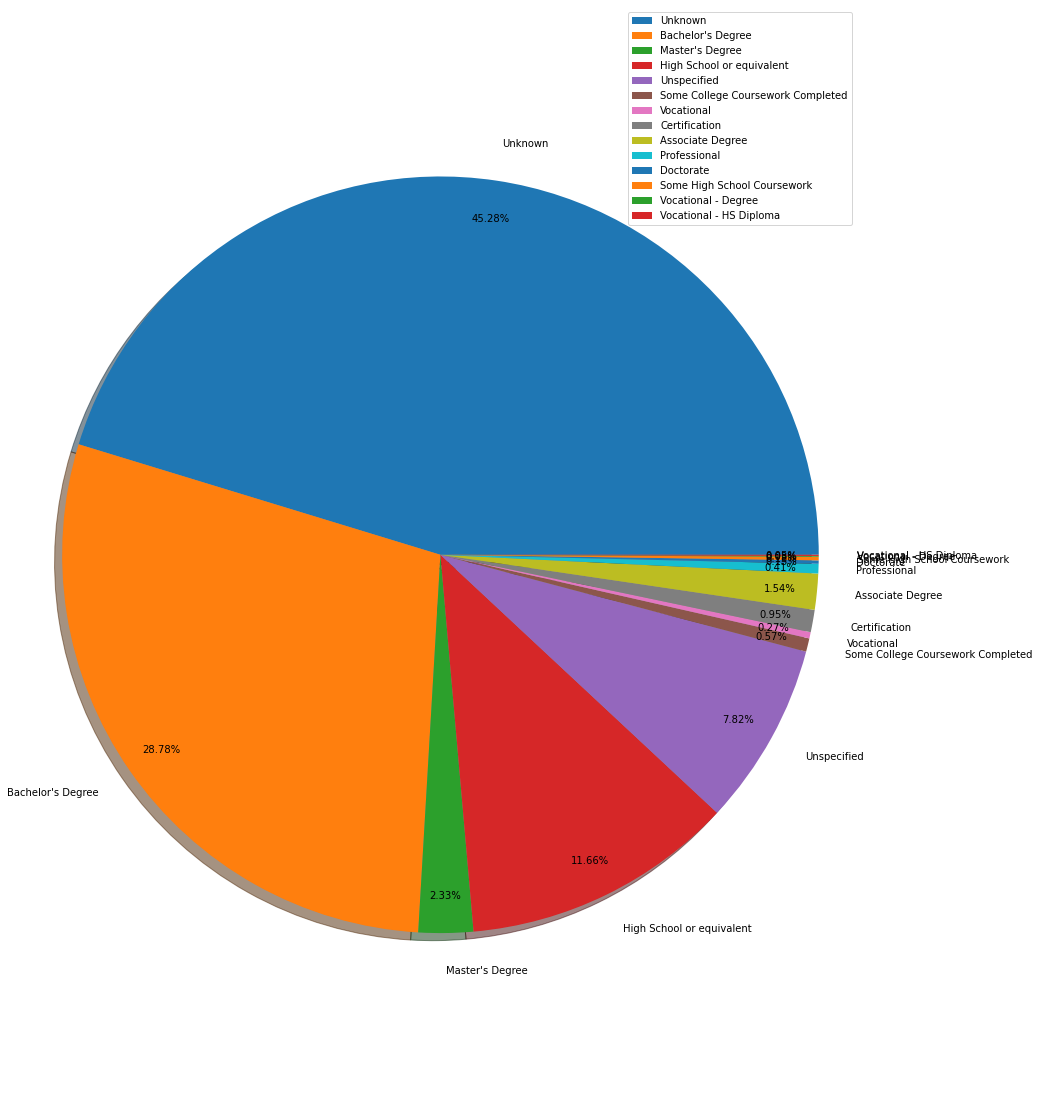

In [20]:
# Statistics of required_education
required_education_count_result = Counter(job_data_df['required_education'])
required_education_types = required_education_count_result.keys()
required_education_counts = [value for key, value in required_education_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(required_education_counts, labels=required_education_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

# required_education in fake JD

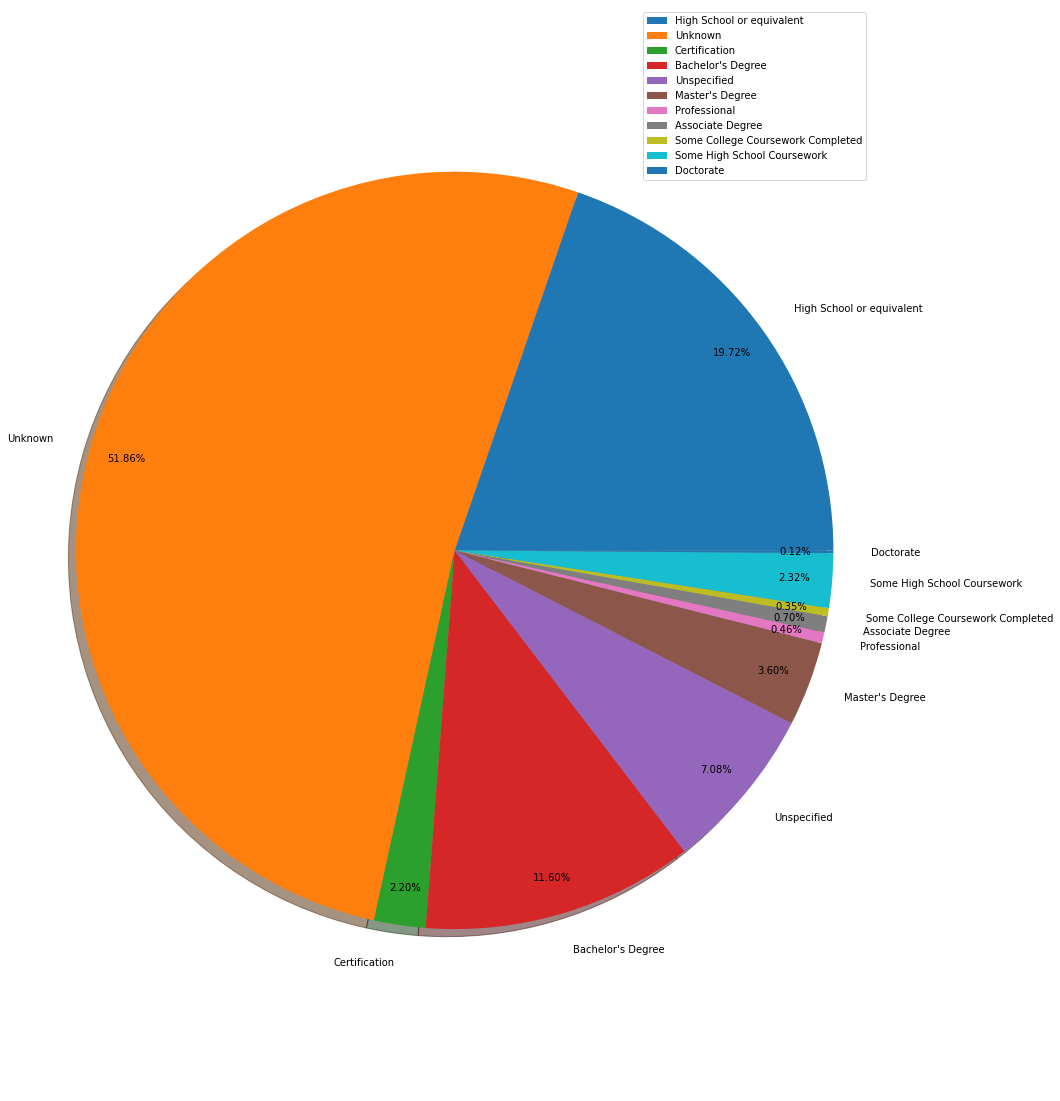

In [21]:
# required_education in fake JD
F_required_education_count_result = Counter(job_data_df.loc[job_data_df['fraudulent']==1]['required_education'])
F_required_education_types = F_required_education_count_result.keys()
F_required_education_counts = [value for key, value in F_required_education_count_result.items()]

# Show the result
plt.figure(figsize=(15,20))
plt.pie(F_required_education_counts, labels=F_required_education_types, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

<h1 style="color:red;">觀察:</h1><br>
可以發現在這個數量下，已不好呈現數據，因此要在後續階段去處理，針對每個等級去展開<br>
當然可以看到有些教育等級在Fake JD是沒有的，例如:vocational degree，這可以是重要依據

# Statistics of required_education

In [31]:
# computing fake JD counts and rate for each required_education type
required_education_fake_counts = []
for required_education_type in required_education_types:
    data_filter = (job_data_df['required_education'] == required_education_type)&(job_data_df['fraudulent']== 1)
    required_education_fake_counts.append(len(job_data_df.loc[data_filter]['required_education']))

required_education_fake_rate = ['{:0.2f}%'.format(100*fake/total) for total, fake in zip(required_education_counts, required_education_fake_counts)]
display(pd.DataFrame([required_education_counts, required_education_fake_counts, required_education_fake_rate],                      
                     columns=required_education_types, index=['Counts', 'Fake_Counts', 'Fake_rate']))

,Unknown,Bachelor's Degree,Master's Degree,High School or equivalent,Unspecified,Some College Coursework Completed,Vocational,Certification,Associate Degree,Professional,Doctorate,Some High School Coursework,Vocational - Degree,Vocational - HS Diploma
Counts,8073,5131,416,2078,1395,102,48,170,274,73,26,27,6,9
Fake_Counts,447,100,31,170,61,3,0,19,6,4,1,20,0,0
Fake_rate,5.54%,1.95%,7.45%,8.18%,4.37%,2.94%,0.00%,11.18%,2.19%,5.48%,3.85%,74.07%,0.00%,0.00%


<h1 style="color:red;">觀察:</h1><br>
表格化後更清晰，Some High School Coursework需求的JD有七成是假的，可能可以成為一條規則<br>

# Processing "location" to Country, City

In [37]:
# extend the location
country_name = []
city_name = []
city_name_short = []

# Text processing
for location in job_data_df['location']:
    split_location = location.replace(' ', '').split(',')
    
    # split rule 1
    if len(split_location) == 2:
        split_location = [split_location[0],'Unknow', split_location[1]]
    
    # split rule 2
    if len(split_location) == 1:
        split_location = [split_location[0],'Unknow','Unknow']
    
    # split rule 3
    if len(split_location) == 0:
        split_location = ['Unknow','Unknow','Unknow']
    
    country_name.append(split_location[0])
    city_name.append(split_location[2])
    city_name_short.append(split_location[1])

# Add column to table
job_data_df['country'] = country_name
job_data_df['city'] = city_name
job_data_df['city_short'] = city_name_short

# show info
display(job_data_df.info(verbose=True))
display(job_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17828 entries, 0 to 17827
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17828 non-null  int64 
 1   title                17828 non-null  object
 2   location             17828 non-null  object
 3   department           17828 non-null  object
 4   salary_range         17828 non-null  object
 5   company_profile      17828 non-null  object
 6   description          17828 non-null  object
 7   requirements         17828 non-null  object
 8   benefits             17828 non-null  object
 9   telecommuting        17828 non-null  int64 
 10  has_company_logo     17828 non-null  int64 
 11  has_questions        17828 non-null  int64 
 12  employment_type      17828 non-null  object
 13  required_experience  17828 non-null  object
 14  required_education   17828 non-null  object
 15  industry             17828 non-null  object
 16  func

None

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city,city_short
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,...,0,Other,Internship,Unknown,Unknown,Marketing,0,US,NewYork,NY
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,NZ,Auckland,
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,0,Unknown,Unknown,Unknown,Unknown,Unknown,0,US,Wever,IA
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington,DC
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FortWorth,FL


<h1 style="color:red;">觀察:</h1><br>
位置的處理，切割完後要經過3個資料規則，確認3欄位都有補上值，細部檢查可能還要再更多的規則<br>

In [38]:
# Observation of location Data

for column_name in ['country', 'city', 'city_short']:
    if job_data_df[column_name].dtypes == object:
        count_categories = len(Counter(job_data_df[column_name]).keys())
        print(column_name, 'has', count_categories, 'categories')
        print("===========================================")

country has 91 categories
city has 2199 categories
city_short has 326 categories


<h1 style="color:red;">觀察:</h1><br>
整理後有91個國家，2199個城市，城市名稱縮寫看來是非必要項目<br>

# Processing "salary_range" to Upper, Lower

In [48]:
salary_range_up = []
salary_range_down = []
for salary_range in job_data_df['salary_range']:
    salary_range_split = salary_range.split('-')    
    
    # split rule 1
    for value in salary_range_split:
        if value.isdigit() is False:
            salary_range_split = [0,0]
            break
    
    # split rule 2
    if salary_range == "Unknown":
        salary_range_split = [0,0]
    
    # split rule 3
    if len(salary_range_split) == 1:
        salary_range_split = [0, salary_range_split[0]]
        
    salary_range_up.append(int(salary_range_split[0]))
    salary_range_down.append(int(salary_range_split[1]))

job_data_df['salary_range_up'] = salary_range_up
job_data_df['salary_range_down'] = salary_range_down

# show info
display(job_data_df.info(verbose=True))
display(job_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17828 entries, 0 to 17827
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17828 non-null  int64 
 1   title                17828 non-null  object
 2   location             17828 non-null  object
 3   department           17828 non-null  object
 4   salary_range         17828 non-null  object
 5   company_profile      17828 non-null  object
 6   description          17828 non-null  object
 7   requirements         17828 non-null  object
 8   benefits             17828 non-null  object
 9   telecommuting        17828 non-null  int64 
 10  has_company_logo     17828 non-null  int64 
 11  has_questions        17828 non-null  int64 
 12  employment_type      17828 non-null  object
 13  required_experience  17828 non-null  object
 14  required_education   17828 non-null  object
 15  industry             17828 non-null  object
 16  func

None

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,required_experience,required_education,industry,function,fraudulent,country,city,city_short,salary_range_up,salary_range_down
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,...,Internship,Unknown,Unknown,Marketing,0,US,NewYork,NY,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,NZ,Auckland,,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,...,Unknown,Unknown,Unknown,Unknown,0,US,Wever,IA,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington,DC,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FortWorth,FL,0,0


<h1 style="color:red;">觀察:</h1><br>
同樣也需要3條以上的規則，還有觀察到日薪、月薪、年薪問題，或許還有幣值<br>